# Example on Knapsack Problem

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os

os.chdir('..')

In [2]:
from algen.trainer import Trainer

%load_ext autoreload
%autoreload 2

# Problem Statement

In [47]:
seed = 47
np.random.seed(seed)

N = 15
weights = np.random.choice(np.arange(9) + 1, N, replace=True)
values = np.random.permutation(N) + 1
cap = int(0.3 * weights.sum())

print('Cap     :', cap)
print('Weights :', weights)
print('Values  :', values)

Cap     : 26
Weights : [8 7 8 9 9 4 1 8 1 8 8 2 8 3 3]
Values  : [ 4 10 11  7  1  6 13 14  3  9  5 15  8  2 12]


In [48]:
num_generations = 10
pop_size = 10
crossover_rate = 0.9
mutation_rate = 0.1

def fitness(chromosome):
    genotype = chromosome.genotype
    mask = np.where(genotype == 1)
    v, w = values[mask], weights[mask]
    if w.sum() > cap:
        return 0
    return v.sum()

trainer = Trainer(
    chromosome_type='binary',
    chromosome_length=N,
    fitness_function=fitness,
    pop_size=pop_size,
    selection='rws',
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    seed=seed
)

history = trainer.run(num_generations=num_generations, verbose=2)

[Generation 0] - Average fitness: 39.30 - Best fitness: 50 - Best fitness so far: 50
[Generation 1] - Average fitness: 32.90 - Best fitness: 50 - Best fitness so far: 50
[Generation 2] - Average fitness: 30.70 - Best fitness: 53 - Best fitness so far: 53
[Generation 3] - Average fitness: 39.90 - Best fitness: 53 - Best fitness so far: 53
[Generation 4] - Average fitness: 29.70 - Best fitness: 53 - Best fitness so far: 53
[Generation 5] - Average fitness: 23.80 - Best fitness: 53 - Best fitness so far: 53
[Generation 6] - Average fitness: 34.20 - Best fitness: 61 - Best fitness so far: 61
[Generation 7] - Average fitness: 45.10 - Best fitness: 63 - Best fitness so far: 63
[Generation 8] - Average fitness: 40.60 - Best fitness: 63 - Best fitness so far: 63
[Generation 9] - Average fitness: 52.90 - Best fitness: 65 - Best fitness so far: 65
Best generation : 9
Best fitness    : 65
Best chromosome : array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])
Finished in 0:00:00 (avg 0.00s/generat

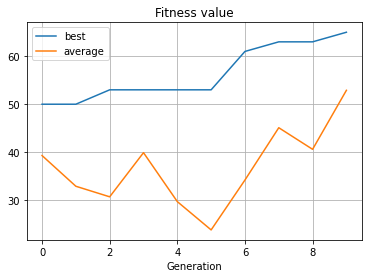

In [49]:
best = history.best_fitness_each_gen()
average = history.average_fitness_each_gen()
generation = history.generation

plt.plot(best, label='best')
plt.plot(average, label='average')

plt.xticks(generation[::2])
plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.title('Fitness value')
plt.show()

# Custom Callback

In [71]:
from algen.callbacks import Callback

trainer = Trainer(
    chromosome_type='binary',
    chromosome_length=N,
    fitness_function=fitness,
    pop_size=20,
    selection='rws',
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    seed=0
)

class PrintAllFitnessInPeriod(Callback):     
    def __init__(self, period=1):
        self.period = period

    def on_generation_end(self, gen, logs=None):
        fitness = logs.get('fitness')

        if gen % self.period == 0:
            msg = f'Generation: {gen} - {fitness}'
            msg += f' - best: {fitness.max()} - avg: {fitness.mean():.1f}'
            print(msg)

callbacks = [PrintAllFitnessInPeriod(period=7)]
history = trainer.run(num_generations=50, verbose=1, callbacks=callbacks)

Generation: 0 - [41 41 41 41 34  0 41 41 41  0  0  0 41  0 41 41 41  0  0  0] - best: 41 - avg: 24.2
Generation: 7 - [ 0  0 28 29 18 41 26 17 35 27  0 39 35 36 34 34  0  0 33 24] - best: 41 - avg: 22.8
Generation: 14 - [41 43 32 29  0 35 29 25 27 35 19 46 22 48 45 41 41 37 39 36] - best: 48 - avg: 33.5
Generation: 21 - [34 35  0 35  0 32 37 22 34 31  0 41 17 29 37  0  0 43 39 31] - best: 43 - avg: 24.9
Generation: 28 - [ 0 57 55  0 51 56 61 58 60 64 45 45 40  0 38  0  0 32 54  0] - best: 64 - avg: 35.8
Generation: 35 - [61 48 50 57 53 61  0 48 47 55 61 38 64 41 46 41 53 38 51 43] - best: 64 - avg: 47.8
Generation: 42 - [59 45 58 57 46 50 46 64 28 18 38 62 58 46 55 58 43 51 32 47] - best: 64 - avg: 48.0
Generation: 49 - [60 44 42 45 40  0 58 43  0 45 63 38 45  0  0 58 73 58 61 58] - best: 73 - avg: 41.5
Best generation : 43
Best fitness    : 73
Best chromosome : array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])
Finished in 0:00:00 (avg 0.00s/generation)


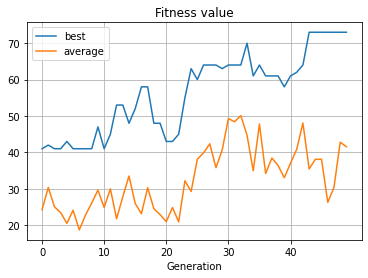

In [72]:
best = history.best_fitness_each_gen()
average = history.average_fitness_each_gen()
generation = history.generation

plt.plot(best, label='best')
plt.plot(average, label='average')

plt.xticks(generation[::10])
plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.title('Fitness value')
plt.show()